In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import numbs
import tree_search
import backprop
import lpbackprop
import jump_backprop
import constraints
import utils

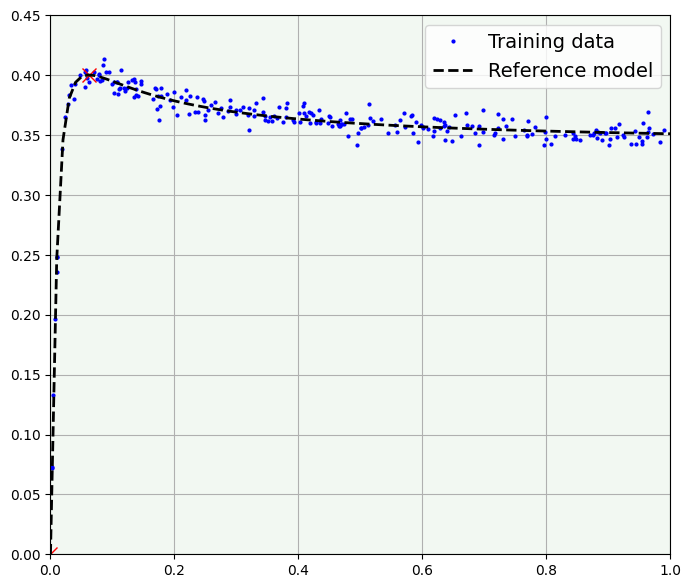

In [2]:
S = dataset.ABSDataset()
S.sample(size=250, noise=0.03, mesh=False)
#S.load('../data/magman.csv')
S.plot(width=8, height=7)

"""new_data = []
for dp in S.data:
    if dp.x < 0 and dp.y > 0 or \
       dp.x > 0 and dp.y < 0: new_data.append(dp)
S.data = new_data"""

S.index()
numbs.init(S)

In [3]:
unknown_stree_a = backprop.UnknownSyntaxTree('A')
unknown_stree_b = backprop.UnknownSyntaxTree('B')
stree     = backprop.BinaryOperatorSyntaxTree('/', unknown_stree_a, unknown_stree_b)
#stree     = backprop.SyntaxTreeGenerator().create_random(5)[0]
stree_pr  = stree.diff().simplify()
stree_pr2 = stree_pr.diff().simplify()
print(str(stree))
print(str(stree_pr))
print(str(stree_pr2))

(A(x) / B(x))
(((A'(x) * B(x)) - (A(x) * B'(x))) / (B(x) ^ 2))
((((((A''(x) * B(x)) + (A'(x) * B'(x))) - ((A'(x) * B'(x)) + (A(x) * B''(x)))) * (B(x) ^ 2)) - (((A'(x) * B(x)) - (A(x) * B'(x))) * ((2 * B(x)) * B'(x)))) / (B(x) ^ 4))


In [4]:
hist_set = []
best_unkn_models = {}
best_eval = None

def onsynth_callback(synth_unkn_models:dict):
    global hist_set
    global best_unkn_models
    global best_eval
    
    print('--- On Synth ---')
    for unkn in synth_unkn_models.keys():
        unkn_model, unkn_model_d1, coeffs_mask, constrs = synth_unkn_models[unkn]
        print(f"{unkn}(x) =\n{unkn_model}")
    print()

    hist, __best_unkn_models, __best_eval = jump_backprop.jump_backprop(stree, stree_pr, synth_unkn_models, S, max_rounds=1)
    hist_set.append(hist)

    if best_eval is None or __best_eval.better_than(best_eval):
        best_unkn_models = __best_unkn_models
        best_eval = __best_eval

lpbackprop.lpbackprop(S.knowledge, stree, onsynth_callback)

--- ASP Model ---
sign_unkn("A","-",0,1) sign_unkn("A","-",1,2) sign_unkn("B","-",0,1) sign_unkn("B","-",1,2) sign_unkn("A'","-",0,1) sign_unkn("A'","-",1,2) sign_unkn("B'","-",0,1) sign_unkn("B'","-",1,2) sign_unkn("A''","+",1,2) sign_unkn("A''","+",0,1) sign_unkn("B''","+",1,2) sign_unkn("B''","+",0,1) noroot_unkn("B") root_unkn("A",0)

QP solution: [ 9.02368710e-08 -3.55135576e-07  5.62515955e-07 -4.57931029e-07
  2.04858155e-07 -5.17556493e-08 -5.20511383e-10]

QP solution check: True
QP solution: [ 2.81472478e-08 -7.77859724e-08  8.15466725e-08 -4.01718433e-08
  1.03504516e-08 -1.00000000e+00 -1.00000000e+00]

QP solution check: True
QP solution: [ 4.11298048e-08 -1.61049015e-07  2.53788346e-07 -2.05527566e-07
  9.15573256e-08 -2.32724800e-08  1.15722393e-12]

QP solution check: False
QP solution: [ 6.81240244e-10 -1.84664905e-09  1.93219095e-09 -9.72788406e-10
  2.69002105e-10 -1.00000000e+00 -3.87166886e-15]

QP solution check: False
--- On Synth ---
B(x) =
           6         

--- Best Syntax Tree ---
Training
	mse: 9.131249517506868e-05
	r2: 0.9366049117378982
Testing
	mse: 0
	r2: 0
Knowledge
	mse: 9.080092902862269



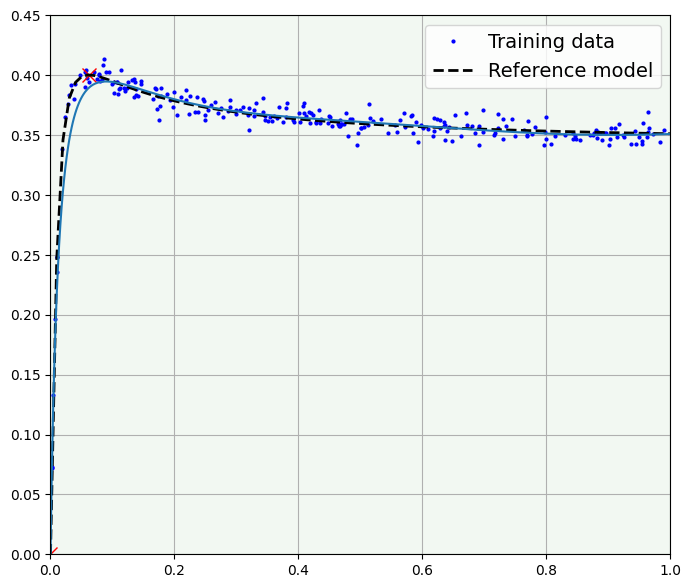

In [5]:
##
## set all synth_unkn_models.
##
#for model_name in synth_unkn_models_set[0].keys():
#    stree.set_unknown_model(model_name, *synth_unkn_models_set[0][model_name])

#
# show best stree.
#
if best_eval is None:
    #_, best_r2 = S.evaluate(stree.compute_output)
    raise RuntimeError('No model found.')
else:
    for unkn_label in best_unkn_models.keys():
        stree.set_unknown_model(unkn_label, best_unkn_models[unkn_label])

print("--- Best Syntax Tree ---")
print(best_eval)
S.plot(width=8, height=7)
xp = np.linspace(S.xl, S.xu, 500)
plt.plot(xp, stree.compute_output(xp));
plt.show()


--- Pull from A(x) ---


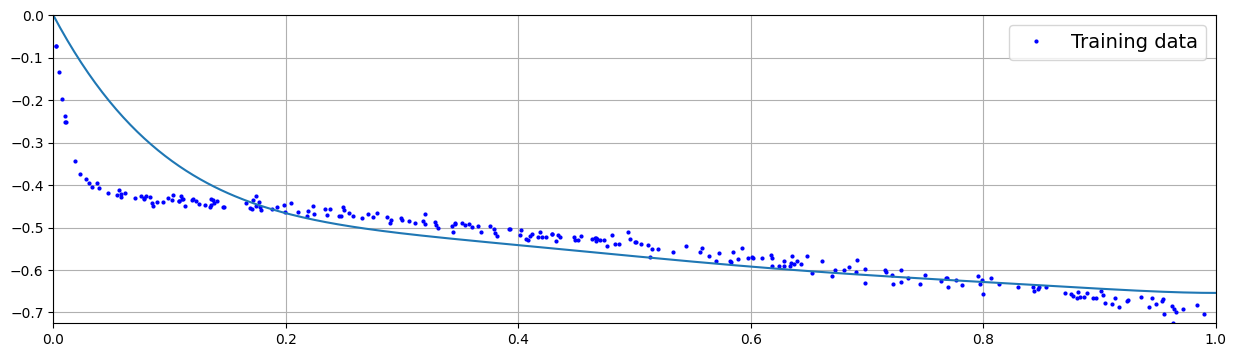

Model:
       6         5         4         3         2
11.68 x - 44.13 x + 67.15 x - 52.49 x + 22.29 x - 5.161 x
Coeffs Softmax:
[0.14991602 0.09403048 0.23834327 0.08768159 0.1638251  0.13023146
 0.13597209]
Coeffs:
[ 11.67954372 -44.12544316  67.14720897 -52.48884231  22.2941503
  -5.1606561    0.        ]

--- Pulled Eq/Ineq Constraints ---

--- Final Model ---
Training
	mse: 0.04697325509809986
	r2: -31.61189662151868
Testing
	mse: 0
	r2: 0
Knowledge
	mse: 32.78903341824063



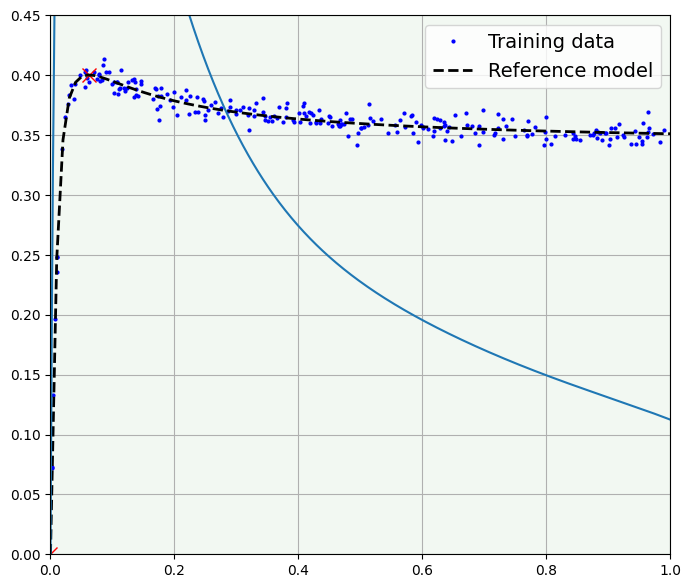



--- Pull from B(x) ---


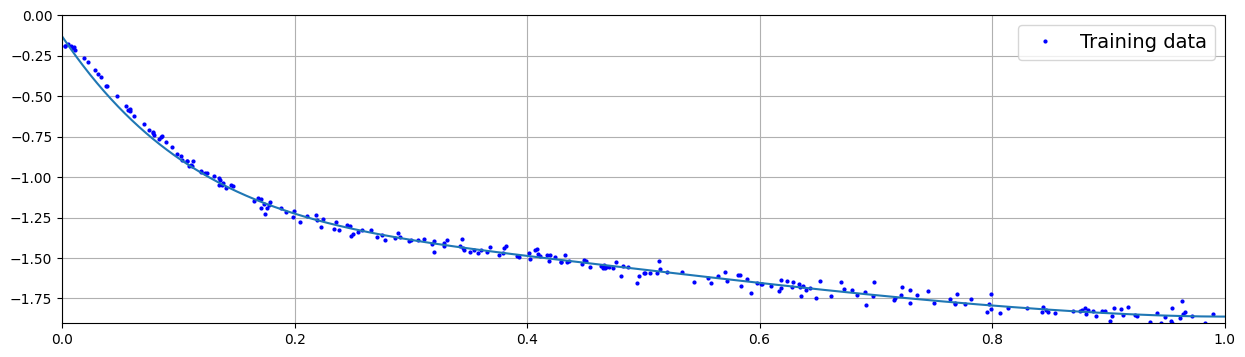

Model:
       6         5         4         3         2
13.27 x - 54.42 x + 91.82 x - 80.73 x + 39.03 x - 10.7 x - 0.1304
Coeffs Softmax:
[0.14730936 0.09950973 0.23223199 0.08543337 0.17101858 0.12819784
 0.13629912]
Coeffs:
[ 13.27422994 -54.41593376  91.82204982 -80.73393458  39.0260308
 -10.70417238  -0.13043273]

--- Pulled Eq/Ineq Constraints ---

--- Final Model ---
Training
	mse: 0.000180853605175562
	r2: 0.8744396345687151
Testing
	mse: 0
	r2: 0
Knowledge
	mse: 7.365044473752586



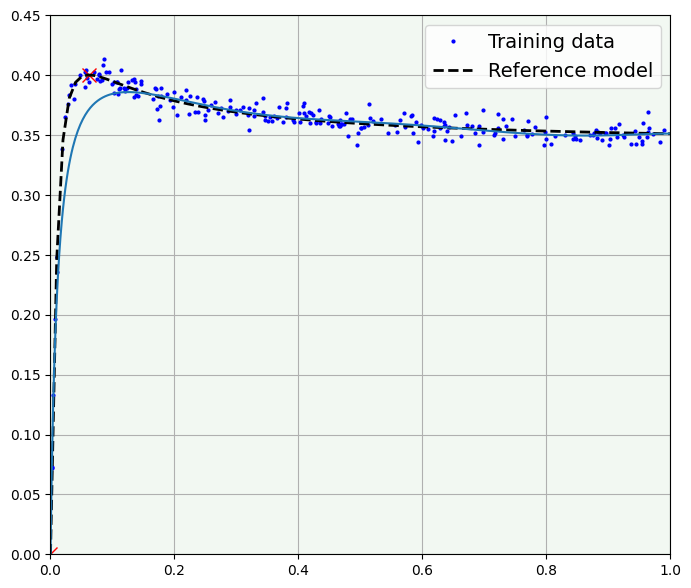



--- Pull from A(x) ---


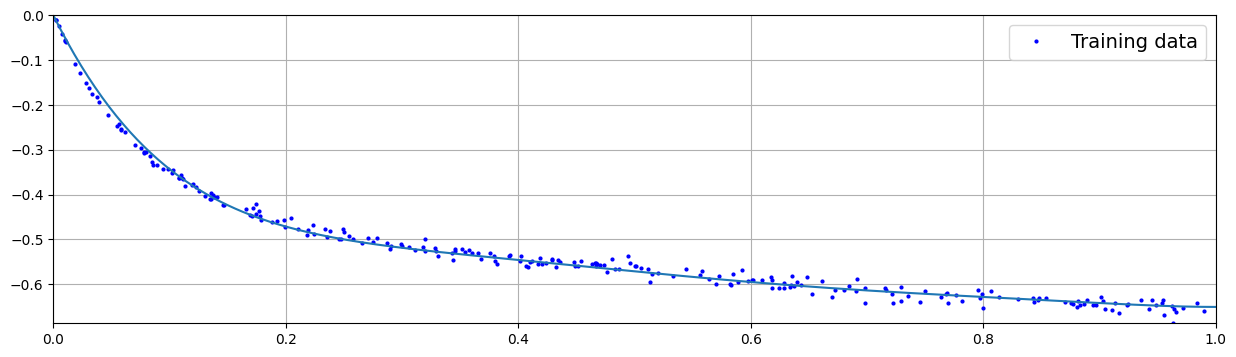

Model:
       6         5         4         3         2
11.51 x - 43.84 x + 67.17 x - 52.79 x + 22.52 x - 5.219 x
Coeffs Softmax:
[0.14969941 0.09436414 0.23807181 0.08758173 0.16407783 0.13020737
 0.13599771]
Coeffs:
[ 11.51445536 -43.84007466  67.16583672 -52.78721965  22.51553612
  -5.21911904   0.        ]

--- Pulled Eq/Ineq Constraints ---
A(0.06182000) = -0.26445205878532846

--- Final Model ---
Training
	mse: 0.00015953687120827758
	r2: 0.8892391012651931
Testing
	mse: 0
	r2: 0
Knowledge
	mse: 7.553055085859434



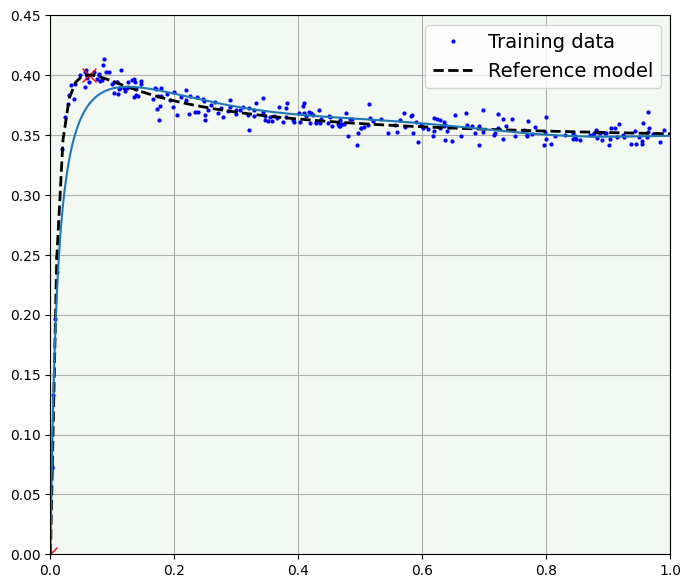



--- Pull from B(x) ---


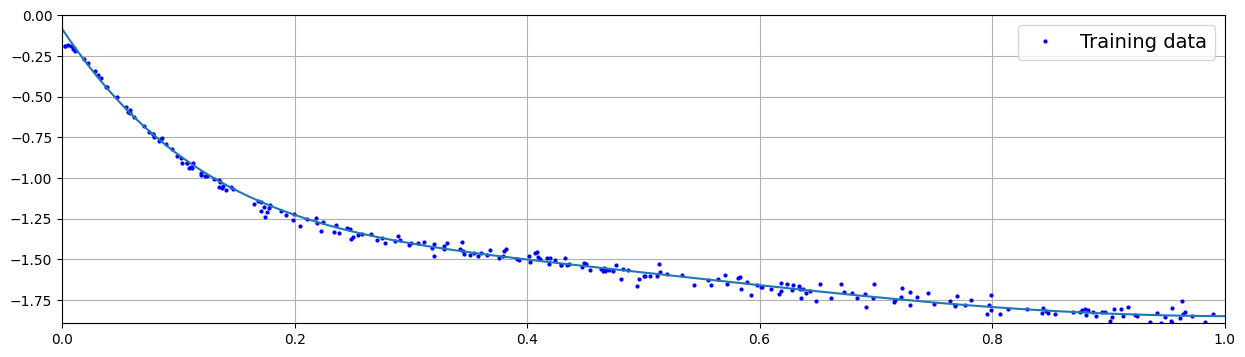

Model:
       6         5         4         3         2
7.165 x - 34.73 x + 67.96 x - 67.65 x + 36.23 x - 10.75 x - 0.08364
Coeffs Softmax:
[0.14410952 0.1058097  0.22562962 0.0830045  0.17856255 0.12627511
 0.13660901]
Coeffs:
[  7.16457807 -34.72833872  67.95957914 -67.64631511  36.23378951
 -10.75040512  -0.08364313]

--- Pulled Eq/Ineq Constraints ---
B(0.06182000) = -0.6200085047377898

--- Final Model ---
Training
	mse: 9.337402733023709e-05
	r2: 0.9351736616917627
Testing
	mse: 0
	r2: 0
Knowledge
	mse: 4.287152382414137



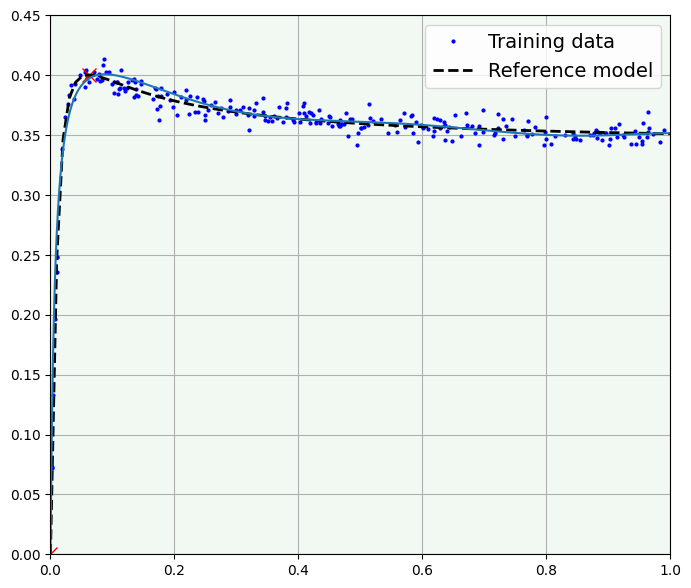

In [6]:
#
# show history (first Answer Set only).
#

constrmap = constraints.ConstraintMap()

for hist_entry in hist_set[0].entries:
    print(f"\n--- {hist_entry.msg} ---")
    
    if len(hist_entry.pulled_S.data) > 0:
        #y_scaled = utils.scale_y([dp.y for dp in hist_entry.pulled_S.data])
        #for i, dp in enumerate(hist_entry.pulled_S.data):
        #    dp.y = y_scaled[i]
        hist_entry.pulled_S.plot(width=15, height=4, plotref=False)
        xp = np.linspace(hist_entry.pulled_S.xl, hist_entry.pulled_S.xu, 500)
        plt.plot(xp, hist_entry.fit_model(xp));
        #plt.xlim(S.xl, S.xu)
        #plt.ylim(S.yl, S.yu)

        plt.show()
        #model, _ = utils.simplify_poly(hist_entry.fit_model, None)
        model = hist_entry.fit_model
        print(f"Model:\n{model}")
        print(f"Coeffs Softmax:\n{utils.coeffs_softmax(model.c)}")
        print(f"Coeffs:\n{model.c}")

    print("\n--- Pulled Eq/Ineq Constraints ---")
    for derivdeg in hist_entry.pulled_constrs.keys():
        for (dp, relopt) in hist_entry.pulled_constrs[derivdeg].eq_ineq:
            dp_x_str = "{:.8f}".format(dp.x)
            dp_y_str = str(dp.y) #"{:.8f}".format(dp.y)
            prime_sign = "'" * derivdeg
            constrmap.add(hist_entry.model_name + prime_sign, dp.x, dp.y, relopt)
            print(f"{hist_entry.model_name}{prime_sign}({dp_x_str}) {relopt.opt} {dp_y_str}")
    
    if len(hist_entry.violated_constrs) > 0:
        print("\n--- Violated Constraints ---")
        for (dp, relopt) in hist_entry.violated_constrs:
            dp_x_str = "{:.2f}".format(dp.x)
            dp_y_str = "{:.2f}".format(dp.y)
            print(f"m({dp_x_str}) {relopt.opt} {dp_y_str}")

    print("\n--- Final Model ---") 
    stree.set_unknown_model(hist_entry.model_name, hist_entry.fit_model)
    model_eval = S.evaluate(stree.compute_output)
    print(model_eval)
    
    S.plot(width=8, height=7)
    xp = np.linspace(S.xl, S.xu, 500)
    plt.plot(xp, stree.compute_output(xp));
    plt.show()

    print()